Generate a synthetic dataset with random values

|        Age      |      Salary       |      No. of Family Members        |      Buys of Flat        |
|-----------------|-------------------|-----------------------------------|--------------------------|
|                 |                   |                                   |                          |

Design an MP Neuron model to predict the output using step function

In [1]:
import pandas as pd
import numpy as np
import random

### Creating a Dataframe 

In [2]:
data = []

for i in range(500):
    data.append([random.randint(25,50), random.randint(1, 25) * 100000, random.randint(2,6), random.randint(0,1)])
    
df = pd.DataFrame(data, columns=['age', 'salary', 'family_members', 'buys_of_flat'])

display(df)

,age,salary,family_members,buys_of_flat
0,35,1400000,4,0
1,48,200000,5,0
2,25,1800000,2,1
3,29,2400000,6,1
4,38,700000,3,1
...,...,...,...,...
495,35,2000000,6,0
496,43,2000000,4,1
497,30,1500000,5,0
498,26,1600000,4,1


### Test Train Split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop('buys_of_flat', axis=1)
Y = df['buys_of_flat']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3 , stratify=Y)

In [6]:
X.shape, X_train.shape, X_test.shape

((500, 3), (350, 3), (150, 3))

In [7]:
Y.shape, Y_train.shape, Y_test.shape


((500,), (350,), (150,))

### Binarisation of Input

In [8]:
import matplotlib.pyplot as plt

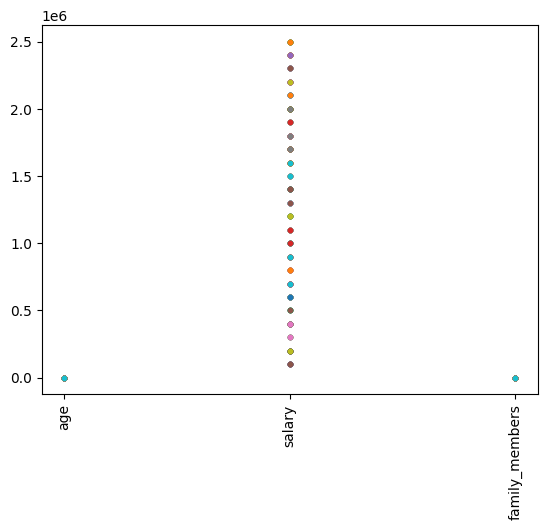

In [9]:
plt.plot(X_train.T, '.')
plt.xticks(rotation='vertical')
plt.show()

In [10]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1, 0])
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1, 0])

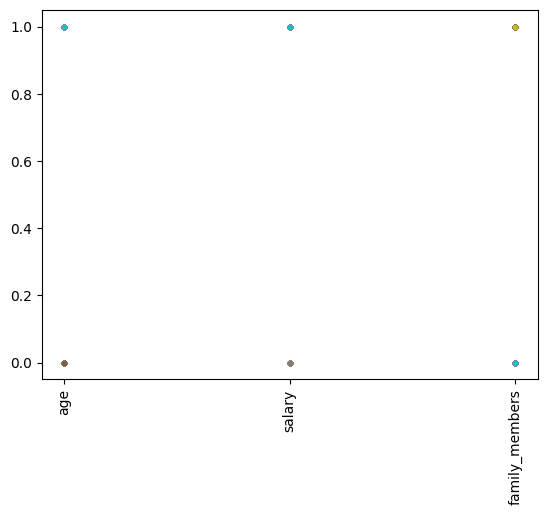

In [11]:
plt.plot(X_binarised_train.T, '.')
plt.xticks(rotation='vertical')
plt.show()

### MP Neuron Class

In [12]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [13]:
b = 3

i = random.randint(0, X_binarised_train.shape[0])

print('For row', i)
if (np.sum(X_binarised_train[100, :]) >= b):
    print('MP Neuron inference is buy : TRUE')
else:
    print('MP Neuron inference is buy : FALSE')

if (Y_train[i] == 1):
    print('Ground truth is buy : TRUE')
else:
    print('Ground truth is buy : FALSE')

For row 124
MP Neuron inference is buy : TRUE
Ground truth is buy : TRUE


In [14]:
for b in range(X_binarised_train.shape[1] + 1):
    Y_pred_train = []
    accurate_rows = 0

    for x, y in zip(X_binarised_train, Y_train):
        y_pred = (np.sum(x) >= b)
        Y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/X_binarised_train.shape[0])

0 175 0.5
1 174 0.49714285714285716
2 177 0.5057142857142857
3 170 0.4857142857142857


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
        
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.asarray(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
            
        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b
        
        print('Optimal value of b is ', best_b)
        print('Highest accuracy is ', accuracy[best_b])

In [17]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is  2
Highest accuracy is  0.5057142857142857


In [18]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [19]:
accuracy_test

0.5533333333333333